In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# connects SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [10]:
# check the columns of the measurement table
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x123c1deb8>,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08}

In [12]:
# Retrieves the last 12 months of precipitation data, finding the average prcp of each day
precipitation = session.query(Measurement.date, func.avg(Measurement.prcp)).\
    group_by(Measurement.date).\
    order_by(Measurement.date.desc()).limit(365).all()
precipitation


[('2017-08-23', 0.1325),
 ('2017-08-22', 0.16666666666666666),
 ('2017-08-21', 0.19333333333333336),
 ('2017-08-20', 0.005),
 ('2017-08-19', 0.03),
 ('2017-08-18', 0.02),
 ('2017-08-17', 0.0475),
 ('2017-08-16', 0.1525),
 ('2017-08-15', 0.164),
 ('2017-08-14', 0.062),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.04666666666666667),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.0175),
 ('2017-08-09', 0.049999999999999996),
 ('2017-08-08', 0.11000000000000001),
 ('2017-08-07', 0.0125),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.03),
 ('2017-08-04', 0.015),
 ('2017-08-03', 0.017499999999999998),
 ('2017-08-02', 0.075),
 ('2017-08-01', 0.04666666666666666),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.06),
 ('2017-07-29', 0.10166666666666667),
 ('2017-07-28', 0.11),
 ('2017-07-27', 0.0016666666666666668),
 ('2017-07-26', 0.08333333333333333),
 ('2017-07-25', 0.08714285714285715),
 ('2017-07-24', 0.6539999999999999),
 ('2017-07-23', 0.22600000000000003),
 ('2017-07-22', 0.7366666666666667),
 ('2017-07-21', 0.

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns=['Date', 'Average Precipitation (in)'])
precipitation_df.set_index('Date', inplace=True, )
precipitation_df = precipitation_df.iloc[::-1]
precipitation_df


,Average Precipitation (in)
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


Text(0, 0.5, 'Average Precipitation (in)')

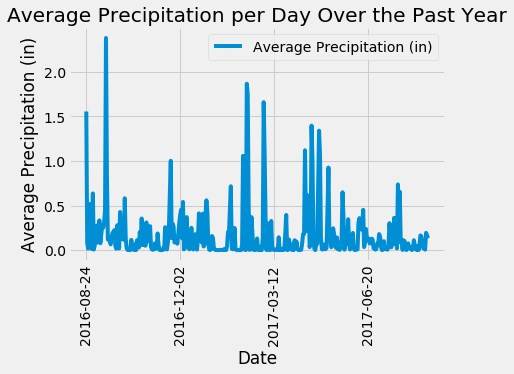

In [15]:
# Uses Pandas Plotting with Matplotlib to plot the data
prcp_plot = precipitation_df.plot(rot=90, title= "Average Precipitation per Day Over the Past Year")
prcp_plot.set_ylabel("Average Precipitation (in)")


In [16]:
# Uses Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()


,Average Precipitation (in)
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [15]:
# Query to show how many stations are available in this dataset.
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).all()

print("There are " + str(len(station_count)) + " stations in this dataset.")


There are 9 stations in this dataset.


In [16]:
# List the stations and the counts in descending order
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# gets the station name of the most active station
most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
most_active_station


('USC00519281')

In [18]:
# Uses the station id from the previous query to calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station.
most_active_station_data = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station[0]).all()

print("The lowest temperature recorded at station " + most_active_station_data[0][0] + " is " + str(most_active_station_data[0][1]) + " degrees.")
print("The highest temperature recorded at station " + most_active_station_data[0][0] + " is " + str(most_active_station_data[0][2]) + " degrees.")
print("The average temperature at station " + most_active_station_data[0][0] + " is " + str(round(most_active_station_data[0][3], 2)) + " degrees.")


The lowest temperature recorded at station USC00519281 is 54.0 degrees.
The highest temperature recorded at station USC00519281 is 85.0 degrees.
The average temperature at station USC00519281 is 71.66 degrees.


In [20]:
# Query to find the last 12 months of temperature observation data for the most active station
tob_12month = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station==most_active_station[0]).\
    filter(Measurement.date > '2016-08-18').\
    order_by(Measurement.date.desc()).all()
tob_12month


[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

In [20]:
# extracts only the TOB's from the list above
tobs = [item[1] for item in tob_12month]
tobs


[79.0,
 76.0,
 76.0,
 77.0,
 77.0,
 77.0,
 83.0,
 82.0,
 77.0,
 76.0,
 81.0,
 82.0,
 81.0,
 76.0,
 75.0,
 77.0,
 75.0,
 82.0,
 77.0,
 77.0,
 77.0,
 76.0,
 76.0,
 76.0,
 80.0,
 80.0,
 76.0,
 74.0,
 74.0,
 72.0,
 69.0,
 78.0,
 78.0,
 75.0,
 74.0,
 77.0,
 78.0,
 76.0,
 81.0,
 79.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 71.0,
 77.0,
 72.0,
 72.0,
 74.0,
 72.0,
 72.0,
 75.0,
 79.0,
 73.0,
 75.0,
 74.0,
 76.0,
 74.0,
 74.0,
 74.0,
 72.0,
 75.0,
 75.0,
 75.0,
 75.0,
 77.0,
 76.0,
 76.0,
 80.0,
 75.0,
 72.0,
 74.0,
 80.0,
 74.0,
 74.0,
 74.0,
 74.0,
 71.0,
 71.0,
 74.0,
 76.0,
 68.0,
 69.0,
 74.0,
 74.0,
 74.0,
 77.0,
 76.0,
 75.0,
 70.0,
 74.0,
 67.0,
 70.0,
 75.0,
 79.0,
 70.0,
 75.0,
 70.0,
 75.0,
 65.0,
 60.0,
 72.0,
 67.0,
 70.0,
 74.0,
 72.0,
 68.0,
 76.0,
 72.0,
 69.0,
 76.0,
 67.0,
 68.0,
 67.0,
 71.0,
 78.0,
 74.0,
 69.0,
 69.0,
 70.0,
 67.0,
 78.0,
 77.0,
 74.0,
 67.0,
 71.0,
 67.0,
 70.0,
 75.0,
 74.0,
 71.0,
 73.0,
 68.0,
 74.0,
 76.0,
 77.0,
 76.0,
 71.0,
 72.0,
 73.0,
 72.0,
 69.0,

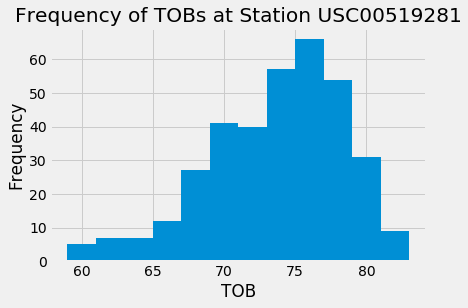

In [21]:
# histogram to show frequencies of TOBs from most active station
plt.hist(tobs, bins=12)
plt.xlabel("TOB")
plt.ylabel("Frequency")
plt.title("Frequency of TOBs at Station " +  most_active_station[0])
plt.show()


## Bonus Challenge Assignment

In [22]:
# gets the tobs for every station in every month of june
june_temps = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
june_temps

# makes the list of tuples into just a list
june_temps_unzipped = [i[0] for i in june_temps]
june_temps_unzipped

# finds the average temp of june dates
june_temps_avg = session.query(func.avg(Measurement.tobs)).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
june_temps_avg


[(74.94411764705882)]

In [23]:
# gets the tobs for every station in every month of december
dec_temps = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
dec_temps

# makes the list of tuples into just a list
dec_temps_unzipped = [i[0] for i in dec_temps]
dec_temps_unzipped

# finds the average temp of december dates
dec_temps_avg = session.query(func.avg(Measurement.tobs)).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
dec_temps_avg


[(71.04152933421226)]

In [24]:
# I'm using an unpaired t-test here to determine if the difference in mean temperatures in June and December is statistically significant
# I'm using unpaired because we are comparing the means.
import scipy.stats as stats
stats.ttest_ind(june_temps_unzipped, dec_temps_unzipped)


Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Uses the previous function `calc_temps` to calculate the tmin, tavg, and tmax for any range of dates
trip2011 = calc_temps('2011-02-28', '2011-03-05')
trip2011


[(61.0, 69.75510204081633, 75.0)]

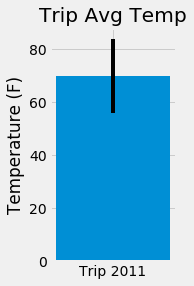

In [27]:
# Plots the results from the previous query as a bar chart. 
# Uses the average temperature for the y value
# Uses the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(2,4))
plt.bar("Trip 2011", trip2011[0][1], width=0.2, yerr=[trip2011[0][2]-trip2011[0][0]])
plt.ylabel("Temperature (F)")
plt.title("Trip Avg Temp")
plt.show()


In [28]:
# Calculates the total amount of rainfall per weather station for a range of dates
trip_range = ['2011-02-28', '2011-03-05']

trip_precipitation = session.query(Measurement.station, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation).\
                    filter(Measurement.date >= trip_range[0]).\
                    filter(Measurement.date <= trip_range[-1]).\
                    filter(Measurement.station == Station.station).\
                    group_by(Measurement.station).\
                    order_by(func.sum(Measurement.prcp).desc()).all()
trip_precipitation


[('USC00518838', 2.33, 21.4992, -158.0111, 306.6),
 ('USC00519281', 2.23, 21.45167, -157.84888999999998, 32.9),
 ('USC00519523', 2.19, 21.33556, -157.71139, 19.5),
 ('USC00514830', 1.96, 21.5213, -157.8374, 7.0),
 ('USC00516128', 1.45, 21.3331, -157.8025, 152.4),
 ('USC00513117', 1.44, 21.4234, -157.8015, 14.6),
 ('USC00519397', 1.38, 21.2716, -157.8168, 3.0),
 ('USC00511918', 0.63, 21.3152, -157.9992, 0.9),
 ('USC00517948', None, 21.3934, -157.9751, 11.9)]

In [29]:
# turns data above into dataframe
trip_precipitation_df = pd.DataFrame(trip_precipitation, columns=["station", "precipitation (in)", "latitude", "longitude", "elevation"])
trip_precipitation_df


,station,precipitation (in),latitude,longitude,elevation
0,USC00518838,2.33,21.49920,-158.01110,306.6
1,USC00519281,2.23,21.45167,-157.84889,32.9
2,USC00519523,2.19,21.33556,-157.71139,19.5
3,USC00514830,1.96,21.52130,-157.83740,7.0
4,USC00516128,1.45,21.33310,-157.80250,152.4
5,USC00513117,1.44,21.42340,-157.80150,14.6
6,USC00519397,1.38,21.27160,-157.81680,3.0
7,USC00511918,0.63,21.31520,-157.99920,0.9
8,USC00517948,NaN,21.39340,-157.97510,11.9


In [30]:
# Creates a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# function usage example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [31]:
# uses function above to calculate the daily normals for a range of dates and pushes each tuple into a list called `normals`
trip_days = ["02-28", "03-01", "03-02", "03-03", "03-04", "03-05"]
normals = [daily_normals(date)[0] for date in trip_days]
normals


[(65.0, 70.65517241379311, 80.0),
 (64.0, 70.0327868852459, 76.0),
 (61.0, 70.36666666666666, 78.0),
 (60.0, 70.06896551724138, 78.0),
 (57.0, 69.27272727272727, 77.0),
 (60.0, 67.89090909090909, 76.0)]

In [32]:
# Loads the previous query results into a Pandas DataFrame and adds the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns=["tmin", "tavg", "tmax"],
                         index = trip_days)
normals_df


,tmin,tavg,tmax
02-28,65.0,70.655172,80.0
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0
03-03,60.0,70.068966,78.0
03-04,57.0,69.272727,77.0
03-05,60.0,67.890909,76.0


Text(0, 0.5, 'Temperature (F)')

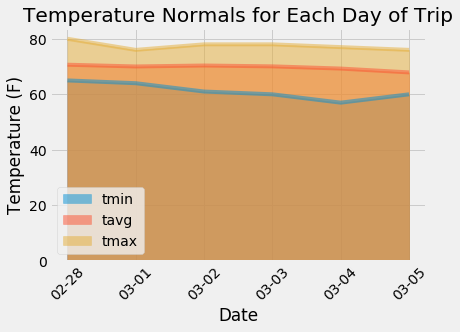

In [33]:
# Plots the daily normals as an area plot
area_plot = normals_df.plot.area(stacked=False, rot=45, title="Temperature Normals for Each Day of Trip")
area_plot.set_xlabel("Date")
area_plot.set_ylabel("Temperature (F)")


In [34]:
# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Station Name</dt><dd>{station}</dd>
<dt>State</dt><dd>Hawaii</dd>
<dt>Elevation</dt><dd>{elevation}</dd>
</dl>
"""
# Store the DataFrame Row
hotel_info = [info_box_template.format(**row) for index, row in trip_precipitation_df.iterrows()]
locations = trip_precipitation_df[["latitude", "longitude"]]


In [36]:
import gmaps

# set layout properties
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations, info_box_content= hotel_info)
# Add the layer to the map
fig.add_layer(markers)
fig


Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…